In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
from tabulate import tabulate


df = pd.read_csv('archive/Childhood malnutrition.csv')
df.head()

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)"
0,Afghanistan,AFG,1997,53.2,44.9,18.2
1,Afghanistan,AFG,2004,59.3,32.9,8.6
2,Afghanistan,AFG,2013,40.4,24.6,9.5
3,Afghanistan,AFG,2018,38.2,19.1,5.1
4,Albania,ALB,1997,20.4,7.1,8.1


In [2]:
import numpy as np
import pycountry
# pip install pycountry-convert
import pycountry_convert as pc

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

def get_continent(x):
    try:
        # Get from alpha_3
        return continents[pc.country_alpha2_to_continent_code(pycountry.countries.get(alpha_3=x).alpha_2)]
    except:
        return np.nan

In [3]:
df['Continent'] = df['Code'].apply(get_continent)

In [4]:
get_continent('AFG')

'Asia'

In [5]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent
780,Timor,TLS,2002,55.7,40.6,13.7,NaN
781,Timor,TLS,2003,54.8,41.5,14.3,NaN
782,Timor,TLS,2007,57.2,49.5,21.3,NaN
783,Timor,TLS,2009,57.5,44.9,18.9,NaN
784,Timor,TLS,2013,51.7,37.5,9.9,NaN


In [6]:
# Manually Adding a Continent for Timor
df['Continent'] = df['Continent'].replace(np.nan, 'Asia')

In [7]:
df[df['Continent'].isna()]

,Entity,Code,Year,"Prevalence of stunting, height for age (% of children under 5)","Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)",Continent


In [8]:
df.rename(columns={"Prevalence of stunting, height for age (% of children under 5)": "Stunting",
                   "Prevalence of underweight, weight for age (% of children under 5)" : "Underweight",
                   "Prevalence of wasting, weight for height (% of children under 5)" : "Wasting"},
         inplace=True)

In [9]:
df.head()

,Entity,Code,Year,Stunting,Underweight,Wasting,Continent
0,Afghanistan,AFG,1997,53.2,44.9,18.2,Asia
1,Afghanistan,AFG,2004,59.3,32.9,8.6,Asia
2,Afghanistan,AFG,2013,40.4,24.6,9.5,Asia
3,Afghanistan,AFG,2018,38.2,19.1,5.1,Asia
4,Albania,ALB,1997,20.4,7.1,8.1,Europe


### Linear Regression by Continent

/Users/amolmenon/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/amolmenon/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/amolmenon/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/amolmenon/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/amolmenon/opt/anaconda3/envs/py37/lib/python3.7/site-pack

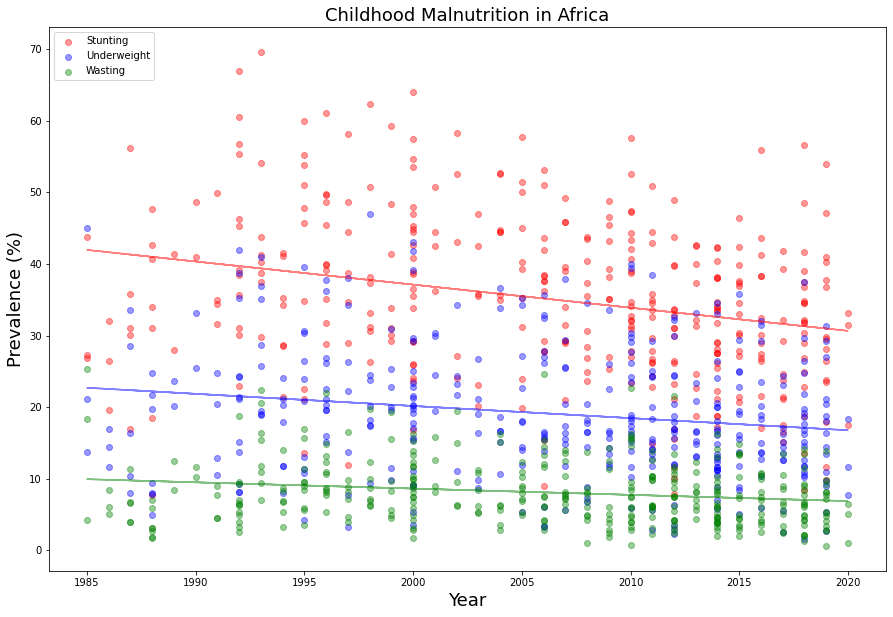

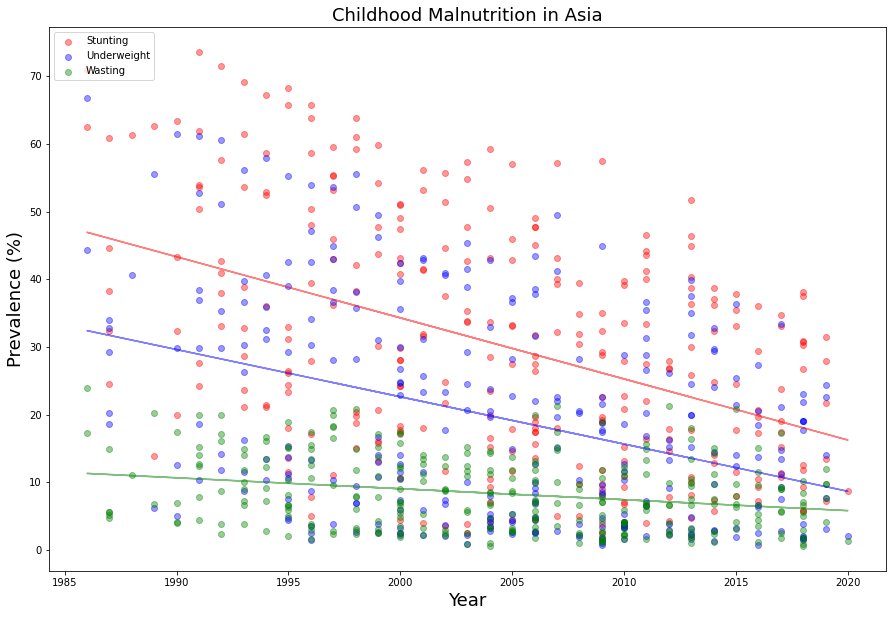

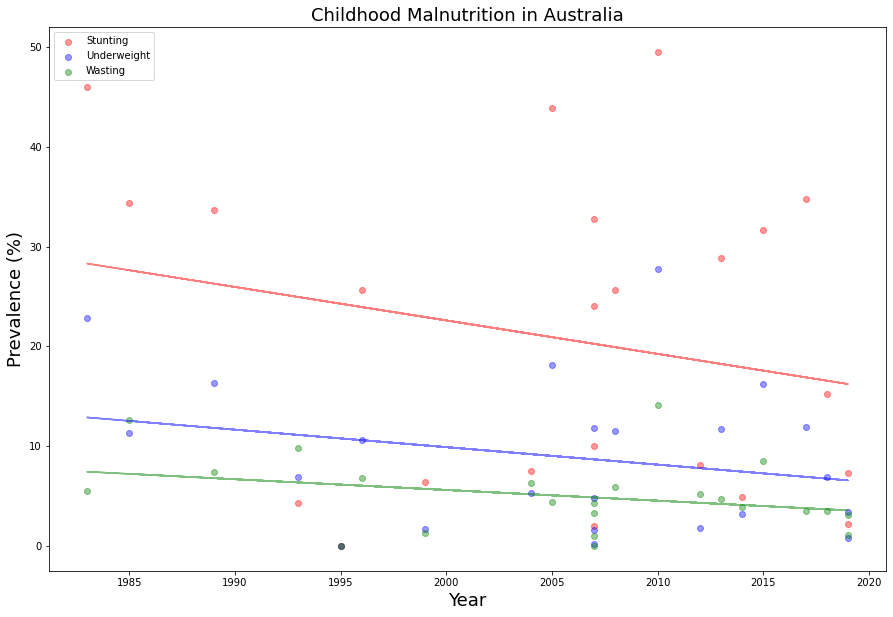

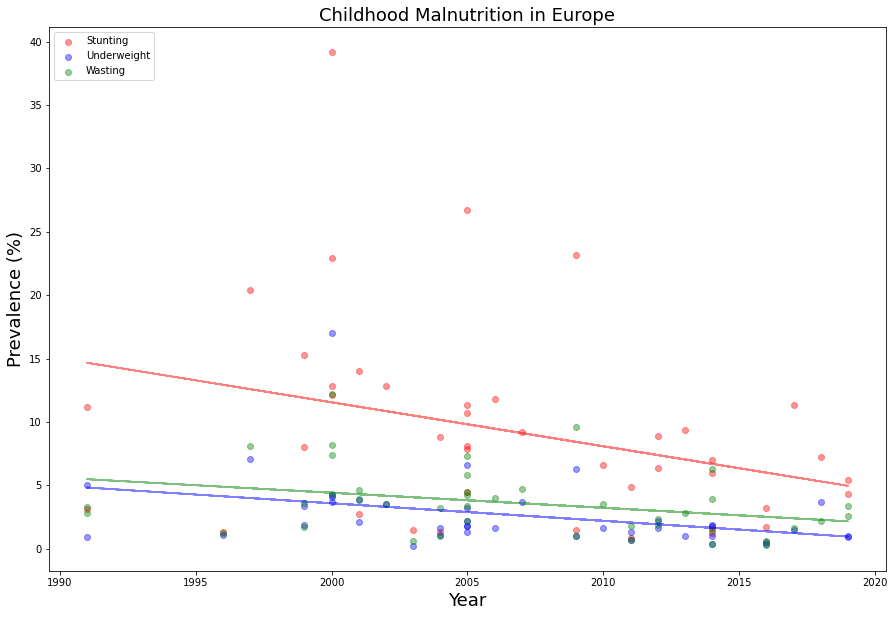

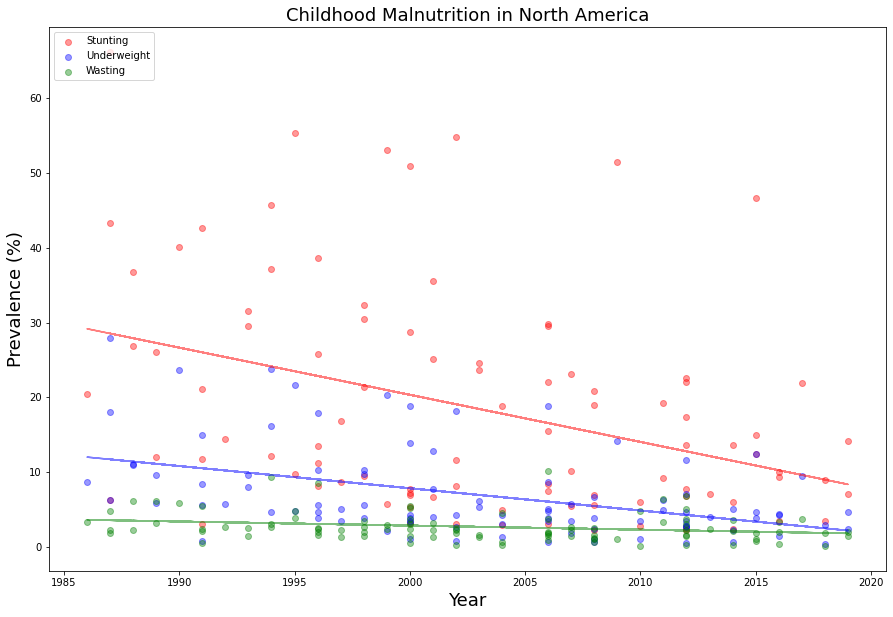

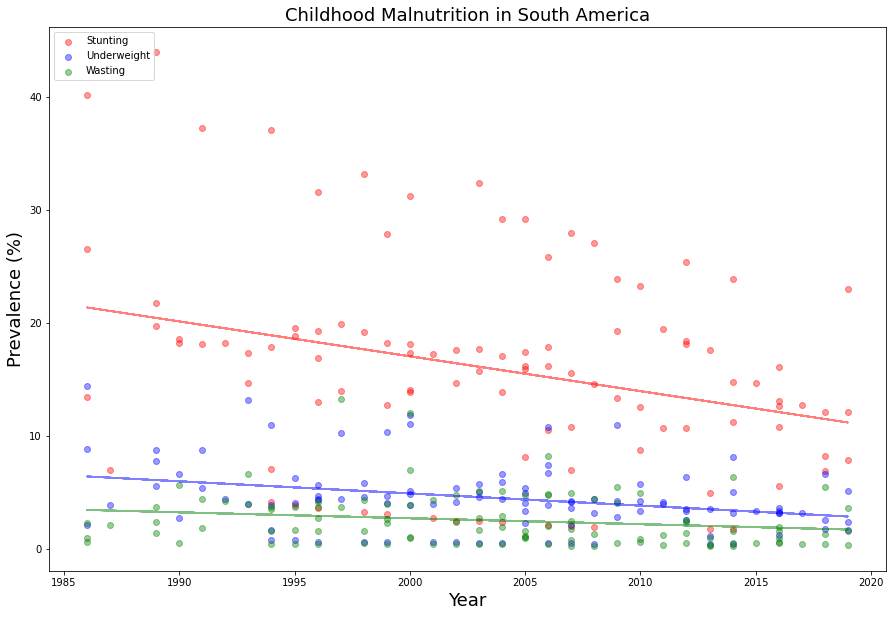

In [10]:
targets = ["Stunting", "Underweight", "Wasting"]

continents = sorted(df['Continent'].unique())
dfs = {}
all_models = {}
# Generating subset dataframes for each continent
for cont in continents:
    dfs[cont] = df.loc[df['Continent'] == cont].copy()
    
# Creating linear regression models for each continent
for cont in continents:
    models = []
    for target in targets:
        X = np.array(dfs[cont]['Year'])
        y = np.array(dfs[cont][target])
        model = stats.linregress(X, y) 
        # Returns slope, intercept, r-value, p-value, stderr
        dfs[cont].loc[:, 'Predicted_' + target] = model[0] * X + model[1]
        models.append(model)
    all_models[cont] = models

# Plotting the results
colors = ['red', 'blue', 'green']
color_map = dict(zip(targets, colors))
for cont in continents:
    fig = plt.figure(figsize=(15, 10))
    for target in targets:
        plt.scatter(dfs[cont]['Year'], dfs[cont][target], c=color_map[target], label=target, alpha=0.4)
        plt.plot(dfs[cont]['Year'], dfs[cont]['Predicted_' + target], c=color_map[target], alpha=0.5)
    plt.xlabel("Year", size=18)
    plt.ylabel("Prevalence (%)", size=18)
    plt.title("Childhood Malnutrition in " + cont, size=18)
    plt.legend(loc='upper left')
    fig.show()

For this project we choose to analyze how our malnutrition metrics (stunting, wasting, underweight) change over time for each continent, by using linear regression for a malnutrition metric vs. year, producing three models per continent. Above, we plot the predictions from the linear models for stunting, wasting, and underweight, for each continent. 

Across all continents, stunting rates are consistently above underweight rates, which are consistently above wasting rates. An exception is Europe, where wasting rates are marginally higher than underweight rates. In most of the graphs, the linear regression lines show that the various malnutrition prevalences are converging in levels, as the more common occurrences (stunting, then underweight) are decreasing faster than wasting.

Generally, the condition of being underweight is a result of stunting, wasting, or a combination of both (https://www.who.int/news-room/fact-sheets/detail/malnutrition). Stunting is generally attributed to chronic undernutrition, whereas wasting is usually indicative of recent and severe weight loss. Because the malnutrition in Europe has higher wasting rates relative to underweight prevalence, we can argue that the malnutrition in Europe is more attributable to wasting than stunting, compared to other continents, or the case could be that this is a result of the noise of the data dominating the actual signal, as there are far fewer data points for Europe than other continents. Similarly, in Australia (Oceania) we observe very few data points.

The fact that underweightness is generally due to a combination of stunting and wasting can also explain the convergence of the linear regression lines. Because stunting rates are decreasing the fastest, wasting rates are decreasing the slowest, and underweight rates are usually decreasing at a rate in between, one could argue that underweightness is caused more by stunting than wasting. A large decrease in stunting corresponds to the same decrease in underweight rates that a small decrease in wasting corresponds to.

It is worth noting that our linear regressions and analysis are limited by our continental grouping of the data. Various countries within the same continent experience childhood malnutrition completely differently. For example, in the graph for South America we can observe a divergent linear pattern of stunting above the trend line, which is likely just the data from an individual country within the continent. By grouping data up by continent, we experience a large variance within continent and possibly violate homoscedasticity assumptions necessary for linear regression, as the variance across time decreases as countries within a continent convergence to lower childhood malnutrition levels. We still believe this is the best choice for our analysis, as the dataset contained too much missing data to analyze individual countries.

In [11]:
p_value_table = []
for cont in continents:
    vals = [model[3] for model in all_models[cont]]
    row = [cont] + vals
    p_value_table.append(row)
cols = ['Continent'] + targets

In [12]:
print("Linear Regression P-Values\n")
print(tabulate(p_value_table, headers=cols))

Linear Regression P-Values

Continent         Stunting    Underweight      Wasting
-------------  -----------  -------------  -----------
Africa         2.81581e-07    0.000817667  0.00043687
Asia           4.14584e-15    2.40751e-11  9.33515e-06
Australia      0.293149       0.251778     0.142537
Europe         0.0372903      0.0201359    0.033773
North America  0.000151146    5.96886e-06  0.0134533
South America  0.00195418     0.00100308   0.045403


To validate our linear regression results, we perform hypothesis testing for each model created. For each continent and malnutrition metric pairing, we can define the following hypotheses:

$$ H_0: \beta=0 $$
$$ H_1: \beta\neq0 $$
where $ \beta $ represents the slope of the line.

Using the Wald Test (https://en.wikipedia.org/wiki/Wald_test) on the t-distribution of the test statistic calculated within Scipy, we perform a two-sided t-test for stunting, underweight, and wasting for each continent; the calculated p-values are in the table above.

With our $\alpha$ level of 0.05, we reject $H_0$ in favor of $H_1$ in every continent for all metrics except Australia, indicating that there is a statistically significant decrease in stunting, underweightness, and wasting over time. As for Australia, we fail to reject $H_0$ for all malnutrition metrics, and thus cannot make any further assessment about how any of the stunting, underweight, or wasting change over time in the continent. The high p-values calculated for Australia can possibly be attributed to the few data points for the continent, as more data consistent with the same linear trend observed from the graph would increase our degrees of freedom relative to the a similar test statistic, which could lead to rejecting $H_0$.

In [13]:
data = {}
p_value_table_anova = []
for target in targets:
    var_data = []
    for cont in continents:
        var_data.append(dfs[cont][target])
    data[target] = var_data
for target in targets:
    F, p = stats.f_oneway(*data[target])
    row = [target] + [p]
    p_value_table_anova.append(row)

In [14]:
print("ANOVA Test P-Values\n")
print(tabulate(p_value_table_anova))

ANOVA Test P-Values

-----------  -----------
Stunting     2.28455e-56
Underweight  2.76413e-56
Wasting      2.32942e-51
-----------  -----------


In addition to examining how malnutrition changes over time within a continent, we also look at how stunting, underweight, and wasting prevalence differ across continents across the entire dataset. We define the following hypotheses:

$$ H_0: \mu_{Africa} = \mu_{Asia} = \mu_{Australia} = \mu_{Europe} = \mu_{North America} = \mu_{South America}$$
$$ H_1: \text{At least one $\mu$ differs from another} $$
where $\mu$ represents the mean stunting, underweight, or wasting prevalence.

Using the one-way ANOVA test on the F-distribution for the F statistics calculated within Scipy, we yield the calculated p-values in the table above.

With our $\alpha$ level of 0.05, we reject $H_0$ in favor of $H_1$ for all malnutrition metrics. This means that there is a statistically significant difference in the prevalence of stunting, underweightness, and wasting, across continents.

### Insights

In this project, we analyzed three childhood malnutrition metrics: stunting, wasting, and underweightness, and how they vary across time in different continents. We observed how the condition of being underweight is a combination of stunting and wasting, and the linear regression results suggested that stunting is a bigger contributor for most continents. Our visualizations also suggest that within continents, various countries experience childhood malnutrition completely differently. Through hypothesis testing, we established that there is a statistically significant decrease in these various malnutrition prevalences over time in all continents, except Australia which likely needs more data for further analysis. Additionally, we verified an intuitive claim that malnutrition levels are different across continents.

Ultimately, the data suggests that addressing childhood malnutrition is a complicated and nuanced challenge, as every continent and country experiences it differently. Because overall prevalence is significantly different across continents, there is backing for an approach where countries and continents that experience childhood malnutrition less provide aid and support for areas that are affected by it more. Furthermore, our visualizations and regression analysis suggest that stunting is a larger contributor in underweight prevalence, which indicates that policies, aid, and guidelines should primarily focus on reducing stunting.